# K - Means Clustering -2

## Imports

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [70]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Select Features to Cluster

In [71]:
# Use Annual Income & Spending Score

reduced_df = df.drop(df.loc[:,:'Age'], axis = 1)
reduced_df.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


## Visualize the Data

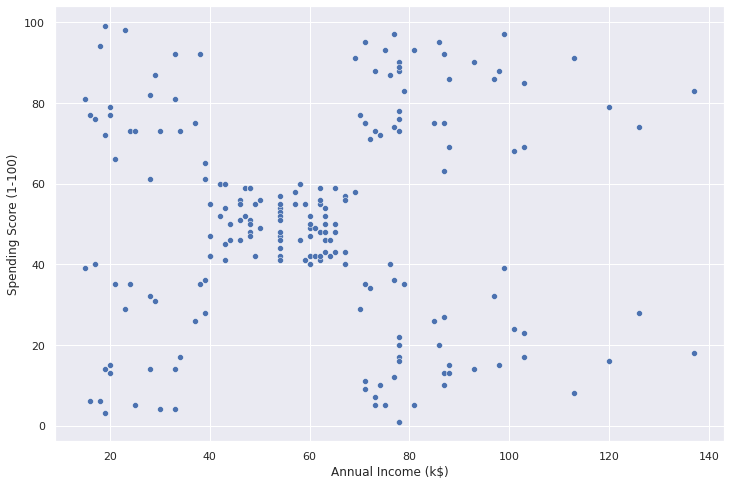

In [72]:
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1])

## Elbow Method for Optimized Clusters

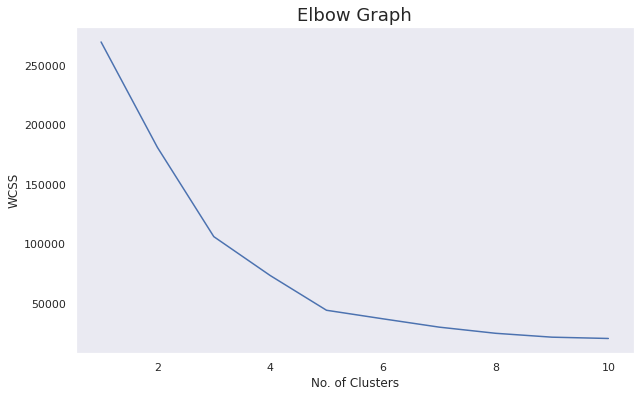

In [73]:
from sklearn.cluster import KMeans

# We will use Within-Cluster-Sum of Squared (WCSS) Errors Algorithm
# WSS score is the sum of these Squared Errors for all the points

wcss = []

for i in range(1, 11):

  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(reduced_df)
  wcss.append(model.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


## Cluster the Data

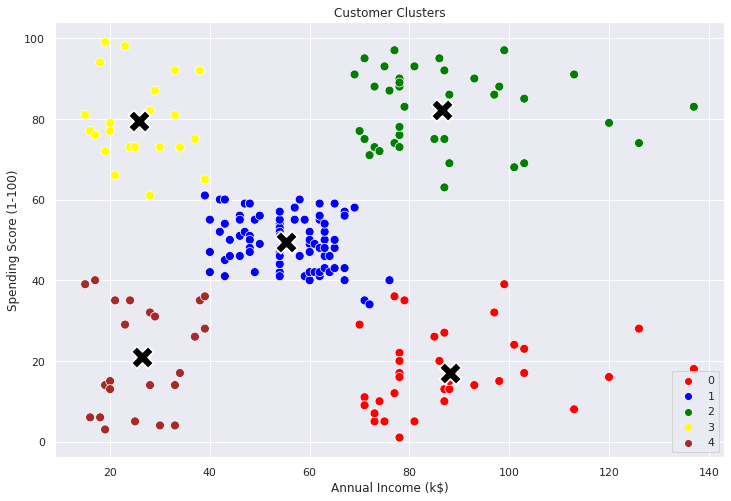

In [74]:
model = KMeans(n_clusters = 5, random_state = 0)
clusters = model.fit_predict(reduced_df)

centroid = model.cluster_centers_

sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1], hue = clusters, palette = ['red','blue','green','yellow','brown'], s = 80).set(title = 'Customer Clusters')
sns.scatterplot(data = centroid, x = centroid[:,0], y = centroid[:,1], s = 500, marker = 'X', color = 'black',)

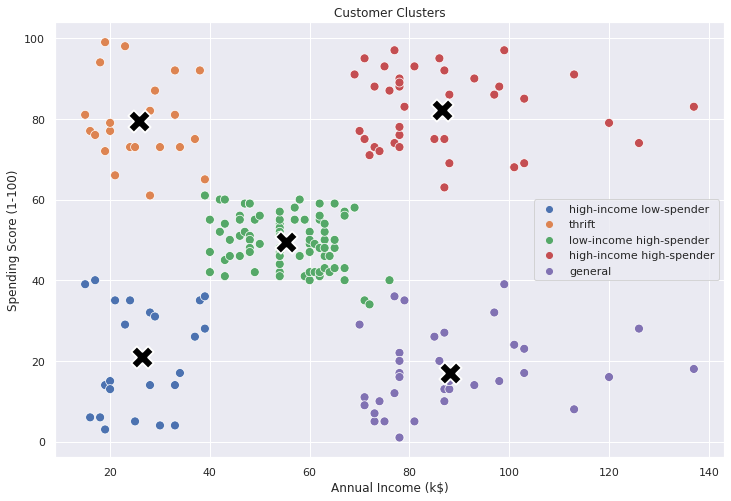

In [76]:
# OR (Fixing Legend)

reduced_df['Cluster Descriptive'] = clusters
reduced_df['Cluster Descriptive'].replace([0,1,2,3,4],['general','low-income high-spender', 'high-income high-spender', 'thrift', 'high-income low-spender'], inplace = True)

sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1], hue = reduced_df['Cluster Descriptive'], s = 80).set(title = 'Customer Clusters')
sns.scatterplot(data = centroid, x = centroid[:,0], y = centroid[:,1], s = 500, marker = 'X', color = 'black')

## Silhouette Score

In [75]:
# Import

from sklearn.metrics import silhouette_score

# Calculate Score

score = silhouette_score(reduced_df, model.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' %score) # Score is not so bad

Silhouette Score: 0.554


## Visualizing Silhouette Score

In [78]:
# Install yellowbrik
# !pip install yellowbrick

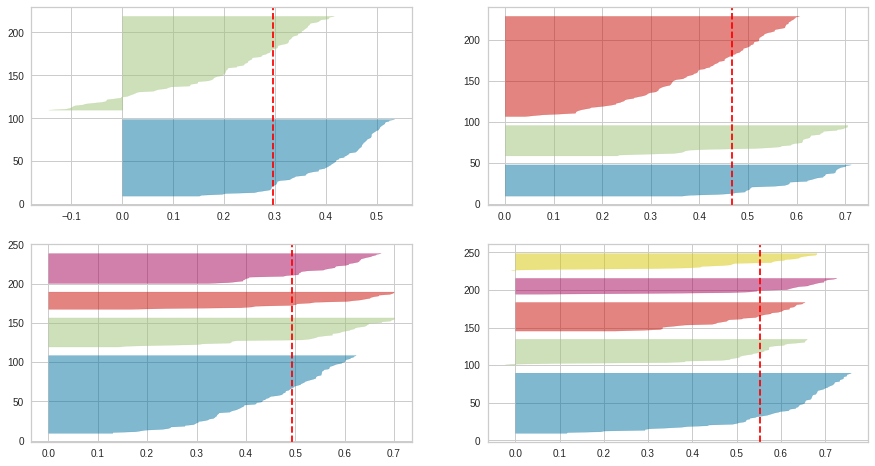

In [96]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize = (15,8))

for i in [2, 3, 4, 5]:

  # Create KMeans instance for different number of clusters

  km = KMeans(n_clusters = i, random_state = 101)
  q, mod = divmod(i, 2)

  # Create SilhouetteVisualizer

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q - 1][mod])
  visualizer.fit(reduced_df.drop('Cluster Descriptive', axis = 1))